<a href="https://colab.research.google.com/github/Fellipedantas/projetos/blob/master/Plano_de_sa%C3%BAde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prevendo preço de Plano de saúde**


# O Brasil totalizou **48.566.216** beneficiários no final de setembro de 2021. Este é o maior número de usuários desde Abril de 2016. Conforma a ANS ( Agencia Nacional de saúde suplemnetar ). Mesmo assim, **60% doas brasileiros**, aproximadamente não possuem plano de saúde. 

  **  1º problema de negócio**

# desenvolver uma metodologia para previsão do valor do plano de saúde para seus benefciários


**2° Anãlise Exploratória**


**3° Pré-processamento dos dados**

**4° e 5° construção e avaliaçao da Máquina Preditiva**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# carregando o dataset:

train_data = pd.read_csv("/content/drive/MyDrive/ProjetoS DS/Train_Data.csv")
train_data.head()

# foram escolhidos essas variávies pois geralmente idosos vão mais a hospital.
# mulheres cuidam mas da súde do que os homens.
# se fuma ou não
# IMC, os obeso tem mais propenção a doenças
# Regiões, pois existe lugares mas carentes no Brasil
# e se tem filhos ou não
# usando o charges, vamos prever o valor dos planos de saúde

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [20]:
# total de registro de beneficiários
train_data.shape

(3630, 7)

In [21]:
# vamos chegar se tem valores nulos
train_data.isnull().sum()

# a base de dados já está limpa, sem dados faltantes 

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

In [22]:
# dimenções

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [23]:
# discrição do dataset (numerica )

train_data.describe()

,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807222
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


In [24]:
# descrição do dataset (categoria)

train_data.describe(include=["O"])

,sex,smoker,region
count,3630,3630,3630
unique,2,2,4
top,male,no,southeast
freq,2029,3070,1021


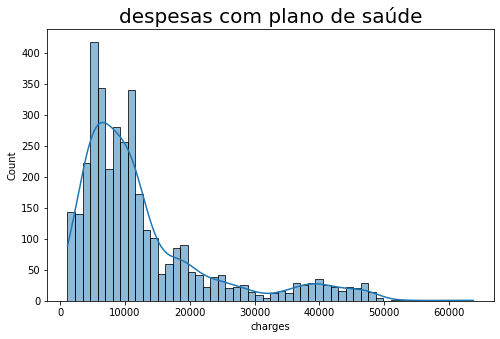

In [25]:
# Taxas dos seguros médicos 
# Histograma das taxas de seguro

plt.figure(figsize=(8,5))
sns.histplot(train_data["charges"], kde= True)
plt.title("despesas com plano de saúde", fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


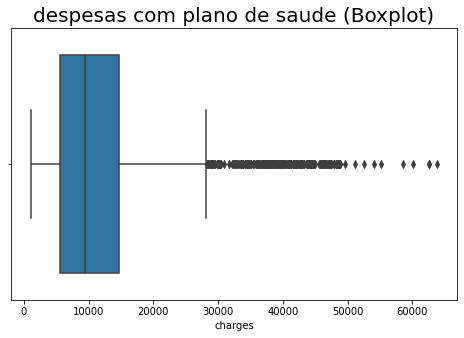

In [26]:
# Bloxplot de despesas médicas 

plt.figure(figsize=(8,5))
sns.boxplot(train_data["charges"])
plt.title("despesas com plano de saude (Boxplot)", fontsize=20)
plt.show()

# por esse gráfico, podemos observar vários Outliers 
# vamos fazer uma linha base para ter uma máquina preditiva melhor

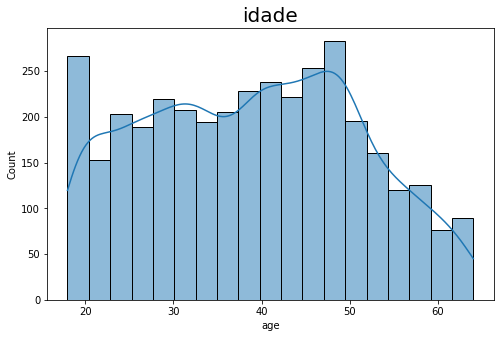

In [29]:
#IDADE

# Vamos construir um Histograma para poder visulalzar as idades 

plt.figure(figsize=(8,5))
sns.histplot(train_data['age'], kde=True)
plt.title("idade", fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


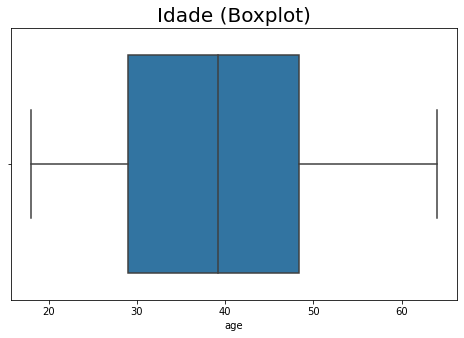

In [30]:
# Boxplot para idade 

plt.figure(figsize=(8,5))
sns.boxplot(train_data['age'])
plt.title('Idade (Boxplot)', fontsize=20)
plt.show()

# sem Outliers 

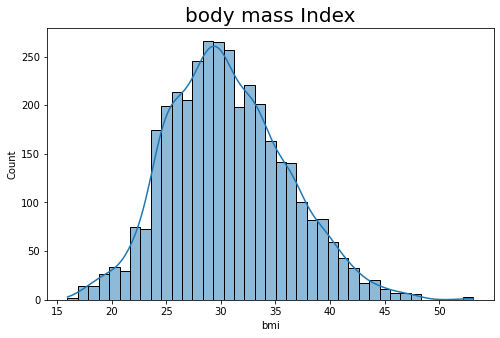

In [33]:
# Histogram para Indece de massa corporal

plt.figure(figsize=(8,5))
sns.histplot(train_data['bmi'], kde=True)
plt.title('body mass Index', fontsize=20)
plt.show()

# mediana considerando obsidade nivel 1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


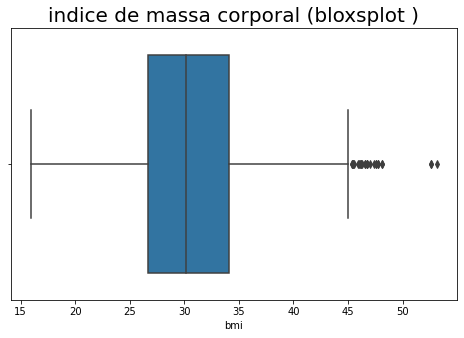

In [35]:
# Boxplot indice de massa corporal
# verificando se existe algum Outlier
# aparecedo pessoas com problemas de obesidade mórmida 

plt.figure(figsize=(8,5))
sns.boxplot(train_data['bmi'])
plt.title('indice de massa corporal (bloxsplot )', fontsize=20)
plt.show()

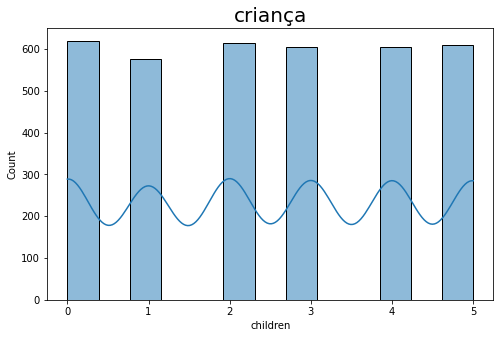

In [38]:
# Histograma para quantidade de filhos 

plt.figure(figsize=(8,5))
sns.histplot(train_data['children'], kde=True)
plt.title('criança', fontsize=20)
plt.show()

# Grande maioria 3 filhos

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


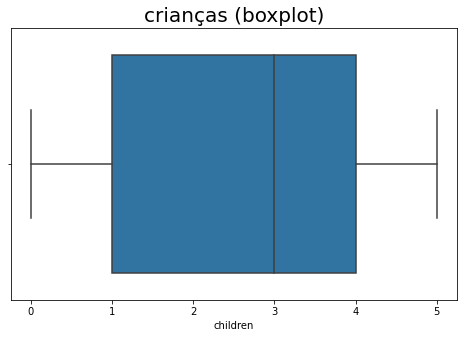

In [40]:
# Boxplot para crianças

plt.figure(figsize=(8,5))
sns.boxplot(train_data['children'])
plt.title('crianças (boxplot)', fontsize=20)
plt.show()

# sem outliers
# mediana em 3 filhos

male : 2029
male : 1601


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


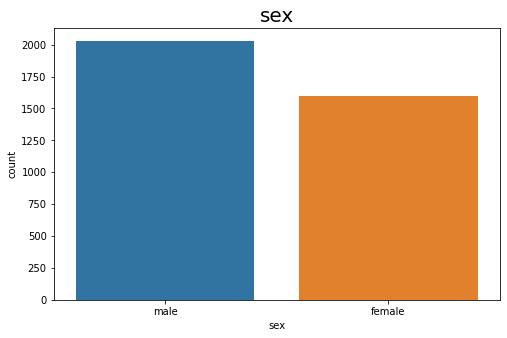

In [41]:
# por sexo

print("male :", train_data['sex'].value_counts()[0])
print("male :", train_data['sex'].value_counts()[1])

# visualização

plt.figure(figsize=(8,5))
sns.countplot(train_data['sex'])
plt.title('sex', fontsize=20)
plt.show()

# por sexo temos um equilíbrio também


Smokers : 560
Non-Smokers : 3070


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


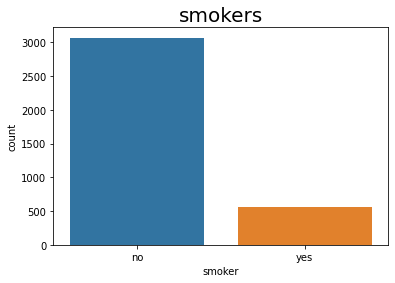

In [52]:
# fumantes

print("Smokers :", train_data['smoker'].value_counts()[1])
print("Non-Smokers :", train_data['smoker'].value_counts()[0])
plt.show()

# visualização

sns.countplot(train_data['smoker'])
sns.countplot(train_data['smoker'])
plt.title('smokers', fontsize=20)
plt.show()

# Maioria não fuma

South-East region : 1021
North-West region : 911
South-West region : 850
North-East region : 848


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


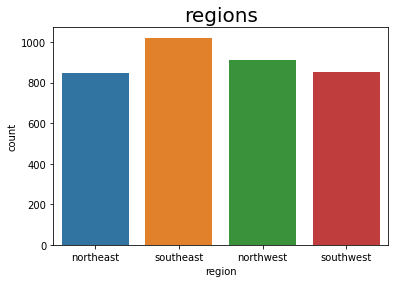

In [60]:
# Por região

print("South-East region :", train_data['region'].value_counts()[0])
print("North-West region :", train_data['region'].value_counts()[1])
print("South-West region :", train_data['region'].value_counts()[2])
print("North-East region :", train_data['region'].value_counts()[3])
# vizualiação

sns.countplot(train_data['region'])
sns.countplot(train_data['region'])
plt.title('regions', fontsize=20)
plt.show()

# Região delimitada por Dataset

In [61]:
# 5 primeiros registros

train_data.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


# 3 PRÉ-PROCESSAMENTO DOS DADOS 

In [62]:
# Arredondar a variável idade 
train_data['age']= round(train_data['age'])

In [63]:
# 5 primeiros registros arredando para cima e para baixo a idade
train_data.head()

,age,sex,bmi,smoker,region,children,charges
0,21.0,male,25.745000,no,northeast,2,3279.868550
1,37.0,female,25.744165,yes,southeast,3,21454.494239
2,18.0,male,30.030000,no,southeast,1,1720.353700
3,37.0,male,30.676891,no,northeast,3,6801.437542
4,58.0,male,32.010000,no,southeast,1,11946.625900


In [66]:
# OHEnconding: tranformar vairáveis em numéricas
train_data = pd.get_dummies(train_data, drop_first=True)

In [67]:
# 2 registros, depois do enconding
train_data.head(2)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,21.0,25.745000,2,3279.868550,1,0,0,0,0
1,37.0,25.744165,3,21454.494239,0,1,0,1,0


In [69]:
# colunas para o dataset

train_data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [70]:
# carregar outras coluna pra ver melhor
train_data= train_data[['age','sex_male','smoker_yes','bmi','children','region_northwest','region_southeast','region_southwest', 'charges']]
train_data.head(2)

,age,sex_male,smoker_yes,bmi,children,region_northwest,region_southeast,region_southwest,charges
0,21.0,1,0,25.745000,2,0,0,0,3279.868550
1,37.0,0,1,25.744165,3,0,1,0,21454.494239


In [71]:
# divisão de recurso dependentes e independentes 

x= train_data.iloc[:, :-1]
y= train_data.iloc[:, :-1]

In [72]:
# 2 registros indedependentes da caracteristicas

x.head(2)

,age,sex_male,smoker_yes,bmi,children,region_northwest,region_southeast,region_southwest
0,21.0,1,0,25.745000,2,0,0,0
1,37.0,0,1,25.744165,3,0,1,0


In [74]:
# teste
# separando o modelo em teste e treinamento

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

**4 e 5 fase**
# construçao da máquina preditiva 